In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
crime_data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime_data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data Pre-processing

In [6]:
crime_data1 = crime_data.set_index('States')
crime_data1.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans

###### I am using two transformation..since to check how cluster numbers varry with diff transformation.

### Using MinMax-Scaler

In [8]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(crime_data1)

### Using Standard-Scaler

In [9]:
scaler2 = StandardScaler()
std_df = scaler2.fit_transform(crime_data1)

## Applying PCA

#### To Standardized Data

In [10]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [11]:
# eigenvalues..

print(pca_std.singular_values_)

[11.13607107  7.0347891   4.22234047]


In [12]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[62.00603948 24.74412881  8.91407951]


In [13]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([62.00603948, 86.75016829, 95.66424781])

###### Conclusion:

by applying PCA on standardized data with 95% variance it gives 8 PCA components.

#### To MinMax-Scaled Data

In [14]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [15]:
# eigenvalues..

print(pca_minmax.singular_values_)

[2.91098167 1.73395131 1.03326488]


In [16]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[64.27287274 22.80460563  8.09789428]


###### Conclusion:

By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

## K-Means Clustering

#### How many numbers of cluster. Also deciding which transformation data we will use to build model.

##### Taking stadardization transformation data & PCA applied on it.

###### Method 1

model1


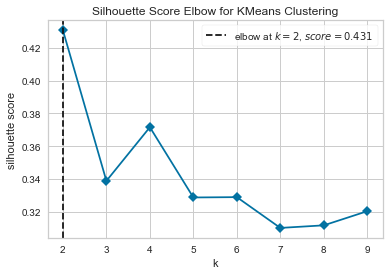

model2


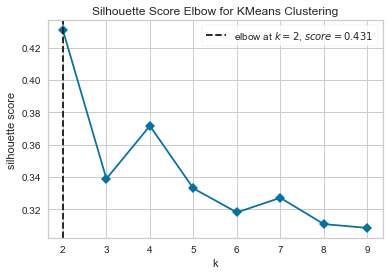

In [17]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method

from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

###### Conclusion:
Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.

Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering.

Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.

So before using KMeans clustering it is better to have discussion or decision on outliers.

###### Method 2

In [18]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.43075151523995503
For n_clusters = 3 The average silhouette_score is : 0.3388445294123241
For n_clusters = 4 The average silhouette_score is : 0.37159826683022595
For n_clusters = 5 The average silhouette_score is : 0.3287491650088078
For n_clusters = 6 The average silhouette_score is : 0.328944688269484
For n_clusters = 7 The average silhouette_score is : 0.310170953416137
For n_clusters = 8 The average silhouette_score is : 0.31174051327165814
For n_clusters = 9 The average silhouette_score is : 0.3203722617000673


###### Conclusion:
By taking standardize data pca it gives number of cluster =2 with silhoette score = 0.43

#### Taking MinMaxScalar transformation data & PCA applied on it.

model3


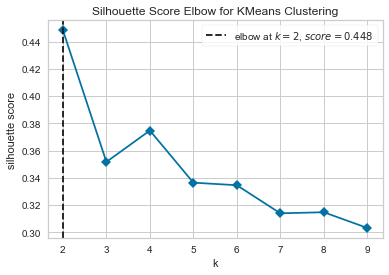

model4


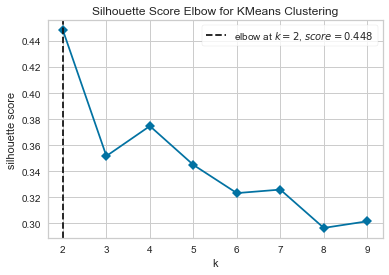

In [19]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

In [20]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.3103977921268028
For n_clusters = 3 The average silhouette_score is : 0.3103977921268028
For n_clusters = 4 The average silhouette_score is : 0.3103977921268028
For n_clusters = 5 The average silhouette_score is : 0.3103977921268028
For n_clusters = 6 The average silhouette_score is : 0.3103977921268028
For n_clusters = 7 The average silhouette_score is : 0.3103977921268028
For n_clusters = 8 The average silhouette_score is : 0.3103977921268028
For n_clusters = 9 The average silhouette_score is : 0.3103977921268028


##### Conclusion:
By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.31

If we check silhouette score with standardize data pca kmeans model 0.43>0.31 

So we will PCA which is applied on Standardized data. Since the score is very less. Best score always close to +1.

## Run K-Means

In [21]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=2, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(50,)

In [22]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [23]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [24]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[-1.10781782, -0.19978289, -0.00213232],
       [ 1.66172672,  0.29967433,  0.00319848]])

In [25]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

96.29014089521222

In [26]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-96.29014089521222

In [27]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

###  Visualizing Silhoutte score. For Different Cluster

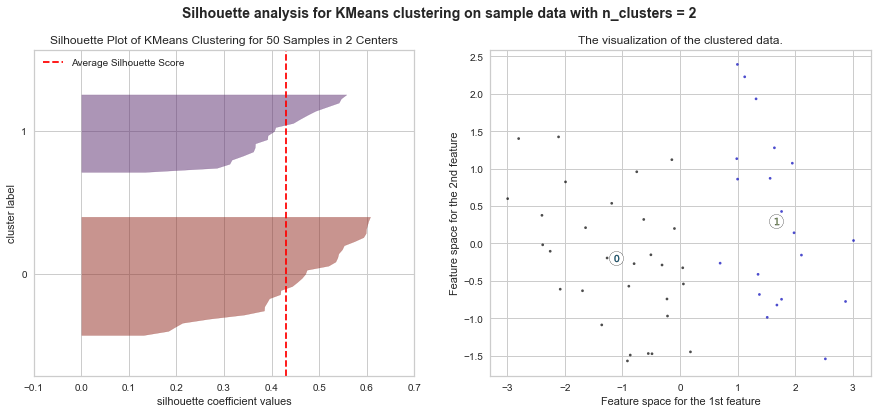

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)


sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

###  Creating Cluster Id's in original dataset & analysis of the same.

In [29]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [30]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([crime_data.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,States,Murder,Assault,UrbanPop,Rape,Kmeans_Clustering
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


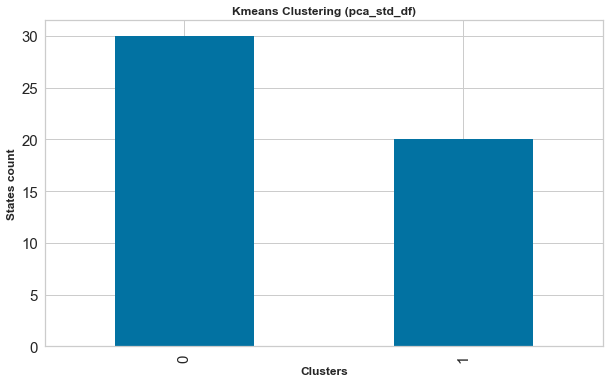

In [31]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['States'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## ========================================================================

## Hierarchical Clustering Algorithm
The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:

##### Taking stadardization transformation data & PCA applied on it

In [32]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4265110406142639
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4265110406142639
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4265110406142639
For n_clusters = 2 The average silhouette_score with linkage- single : 0.24345883776062238

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.33876375545433696
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3915503289909141
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3688801036789719
For n_clusters = 3 The average silhouette_score with linkage- single : 0.15378814316621905

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.36434984546938715
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31357384138874034
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3842679495489614


###### Conclusion: 
Although max score is with cluster numbers 2. I have selected tcluster number = 3

##### Taking MinMax transformation data & PCA applied on it.

In [33]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.44578000705049503
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4278271971840072
For n_clusters = 2 The average silhouette_score with linkage- average : 0.44578000705049503
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21618310204304764

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.34761123569352476
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3294280291525282
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3743823828091993
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14867035404969395

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.35863519696982094
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.34366468006840584
For n_clusters = 4 The average silhouette_score with linkage- average : 0.395268527238257

##### Conclusion: 
Dataset with MinMax transformation & PCA applied on it does imporoved score here. So i am considering MinMax Data for agglomerative Clustering Although max score is with cluster numbers 2. Therefore, considering no. of Clusters = 3.

### Run Hierarchical Clustering.(Agglomerative Clustering)

In [34]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
# Cluster numbers

agg_clustering.n_clusters_

3

In [36]:
# cluster labels for each point

agg_clustering.labels_

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

50

In [38]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_

1

In [39]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[14, 28],
       [12, 31],
       [23, 32],
       [13, 15],
       [21, 30],
       [34, 35],
       [42, 51],
       [22, 48],
       [18, 50],
       [10, 43],
       [11, 26],
       [45, 49],
       [53, 55],
       [36, 46],
       [ 9, 17],
       [25, 60],
       [40, 47],
       [19, 54],
       [ 0, 64],
       [20, 29],
       [39, 52],
       [37, 62],
       [ 2, 56],
       [ 3, 16],
       [61, 71],
       [57, 58],
       [41, 68],
       [33, 44],
       [38, 69],
       [ 4, 27],
       [24, 63],
       [65, 75],
       [ 6, 59],
       [66, 77],
       [ 7, 74],
       [67, 72],
       [80, 84],
       [78, 82],
       [70, 76],
       [ 5, 79],
       [81, 83],
       [73, 86],
       [ 8, 85],
       [87, 91],
       [89, 92],
       [90, 93],
       [88, 94],
       [ 1, 96],
       [95, 97]])

In [40]:
# Clustering Score

(silhouette_score(pca_minmax_df, agg_clustering.labels_)*100).round(3)

37.438

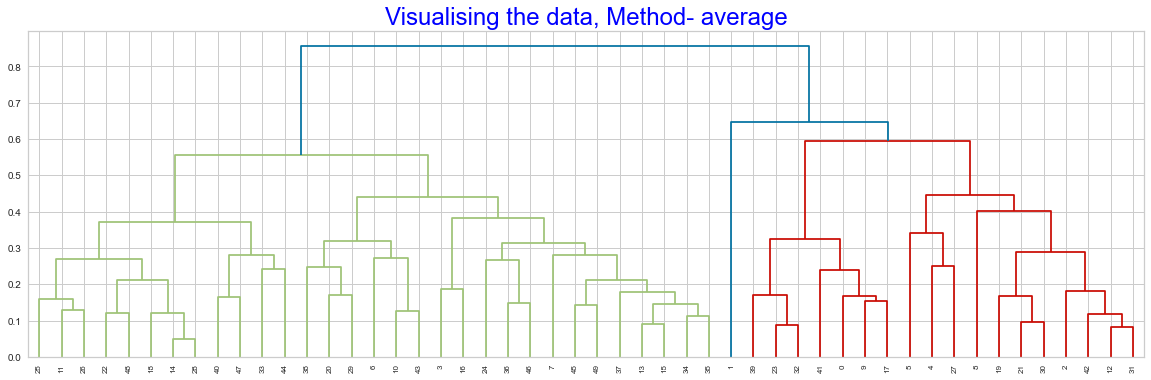

In [41]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

### Creating Cluster Id's in original dataset & analysis of the same.

In [42]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [43]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([crime_data.copy(), hie_cluster], axis=1)
hie_df .head()

,States,Murder,Assault,UrbanPop,Rape,Hie_Clustering
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


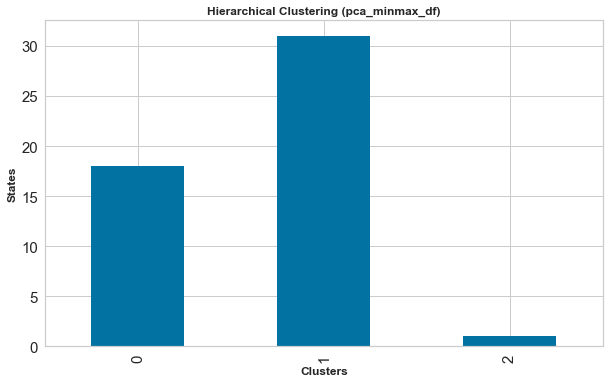

In [44]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['States'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_minmax_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## =======================================================================

## DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

### DBSCAN of Standard Scaled Data

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [46]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [47]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


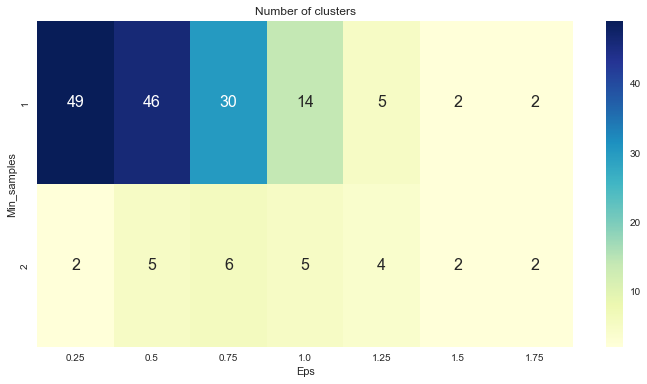

In [48]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

#### As the heatplot above shows, the number of clusters vary from 49 to 2.

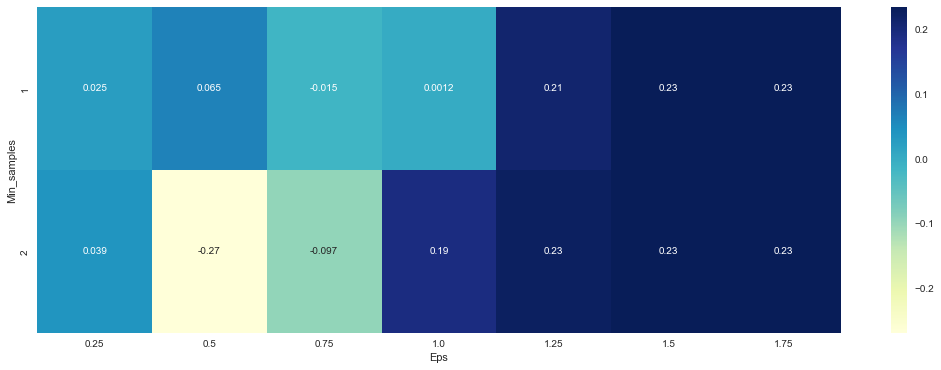

In [49]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

#### Global maximum is 0.23 for eps=1.25 and min_samples=2

In [50]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


#### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [51]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [52]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
# Concating Labels with main dataset copy

crime_data['DBSCAN_labels'] = dbscan.labels_
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,DBSCAN_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [54]:
crime_data.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
DBSCAN_labels,,,,
0,7.742857,168.877551,65.897959,20.757143
1,10.000000,263.000000,48.000000,44.500000


### Silhouette Score for DBSCAN

In [55]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


### DBSCAN on MinMax Scaled Data

#### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [56]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [57]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

##### Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


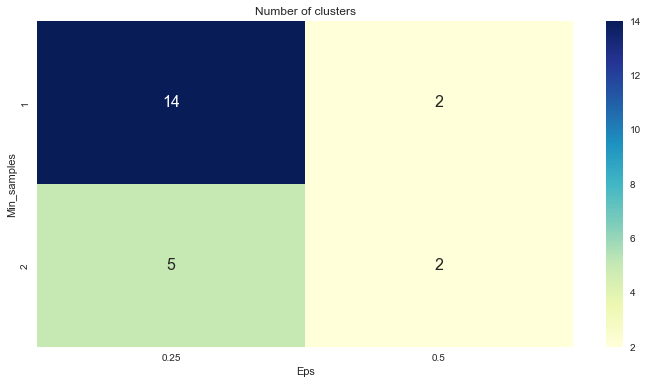

In [58]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

##### As the heatplot above shows, the number of clusters vary from 14 to 2.

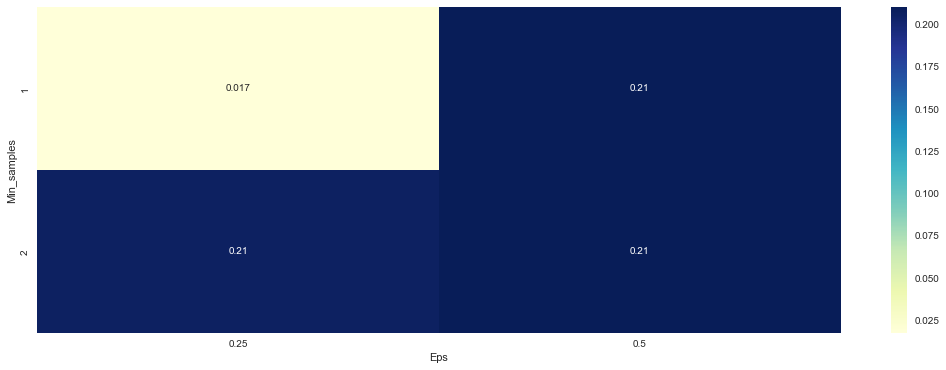

In [59]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

##### Global maximum is 0.21 for eps=0.5 and min_samples=2

In [60]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [61]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [62]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
DBSCAN_clusters = pd.DataFrame(dbscan.labels_.copy(), columns=['DBSCAN Clustering'])

In [67]:
DBSCAN_df = pd.concat([crime_data.copy(), DBSCAN_clusters], axis=1)
DBSCAN_df .head()

,States,Murder,Assault,UrbanPop,Rape,DBSCAN_labels,DBSCAN Clustering
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,0


In [68]:
# Concating Labels with main dataset copy

DBSCAN_df['DBSCAN Clustering'] = dbscan.labels_
DBSCAN_df.head()

,States,Murder,Assault,UrbanPop,Rape,DBSCAN_labels,DBSCAN Clustering
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,0


In [71]:
DBSCAN_df.groupby('DBSCAN Clustering').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,DBSCAN_labels
,mean,mean,mean,mean,mean
DBSCAN Clustering,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.0
1,10.000000,263.000000,48.000000,44.500000,1.0


In [74]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(DBSCAN_df.loc[DBSCAN_df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(DBSCAN_df.loc[DBSCAN_df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [75]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
DBSCAN_labels,0.000000,1.0
DBSCAN Clustering,0.000000,1.0


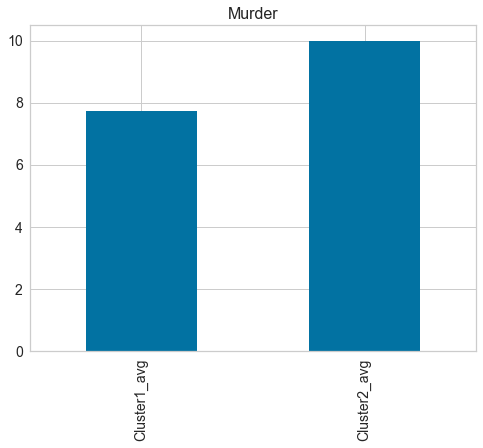

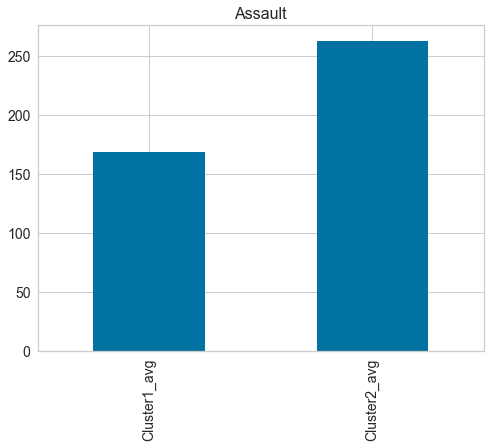

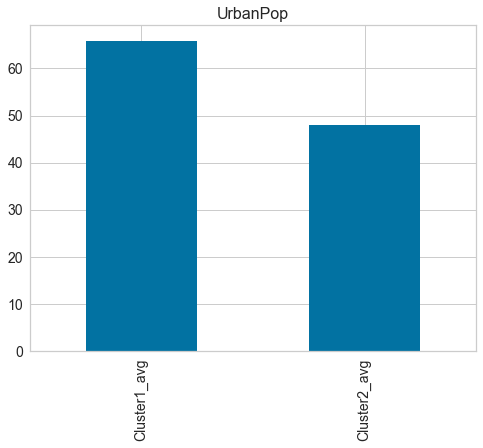

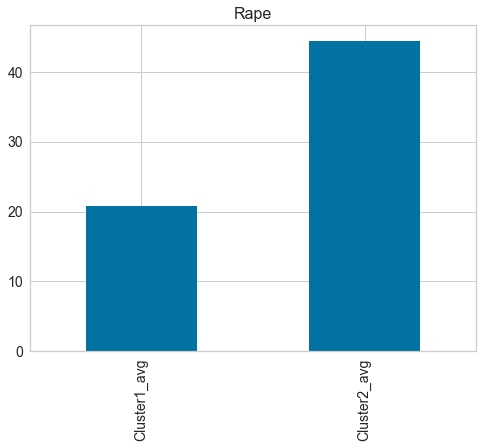

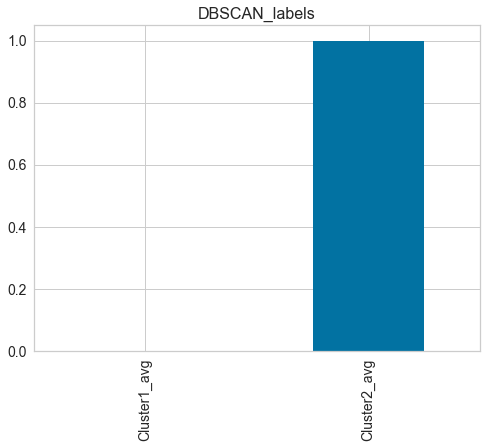

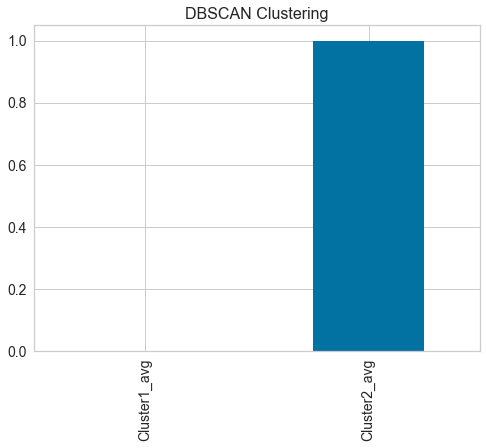

In [76]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

#### Observations:
The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

## Conclusion Between Kmeans, Hierarchical & DBSCAN

In [77]:
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,States,Murder,Assault,UrbanPop,Rape
Kmeans_Clustering,,,,,
0,30,30,30,30,30
1,20,20,20,20,20


In [78]:
hie_df.groupby(['Hie_Clustering']).count()

,States,Murder,Assault,UrbanPop,Rape
Hie_Clustering,,,,,
0,18,18,18,18,18
1,31,31,31,31,31
2,1,1,1,1,1


In [79]:
DBSCAN_df.groupby('DBSCAN Clustering').count()

,States,Murder,Assault,UrbanPop,Rape,DBSCAN_labels
DBSCAN Clustering,,,,,,
0,49,49,49,49,49,49
1,1,1,1,1,1,1


#### Conclusion:
We will go with Kmeans Clustering Since the clustering is sensitive to outliers

# ===========================================================

#### Overview:

    I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
    
    Applied Standardazation & MinMaxScalar transformation on the data

    I have used & analyzed two clustering techniques here..
        i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
    
    By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. 

    So finally the Standard Scaler found less score so not used for further model building.

    KMeans clustering is sensitive to outliers

    